# Ejercicios Aprendizaje Automático.

***
- Autor: Juan A. García Cuevas
- Fecha: 01/10/2016
***

## Librerías principales y configuración

In [1]:
# Importamos algunas librerías
import numpy as np
import pandas as pd
import csv

# Configuramos Jupyter para que los gráficos se incrusten en el notebook
%pylab
%matplotlib inline

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


***
# 1. Reglas de asociación
***

## Enunciado

En el “groceries.csv” contiene las transacciones recogidas durante un mes en una tienda de comestibles. En cada una de las filas de este archivo se encuentran los artículos comprados de forma conjunta por los diferentes clientes. Obtener las lista de artículos que tiene un soporte mínimo de 0,15. Obtener también las reglas de asociación que se pueden deducir de este conjunto de datos con un soporte mínimo de 0,05 y confianza de 0,25.

## 1.2 Cargamos los datos del fichero CSV

In [2]:
# Cargamos el fichero CSV con los datos de tickets
groceries = []
groceries_file = csv.reader(open("data/groceries.csv", "rb"))
for row in groceries_file:
    groceries.append(row)

print 'Los datos se cargan en la variable: groceries'
print 'La variable titanic es de tipo: ', type(groceries)
print 'La variable titanic tiene', len(groceries), "filas (tickets)."
groceries[:10]

Los datos se cargan en la variable: groceries
La variable titanic es de tipo:  <type 'list'>
La variable titanic tiene 9835 filas (tickets).


[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['pot plants'],
 ['whole milk', 'cereals']]

## 1.2 Obtenemos la lista de artículos que tiene un soporte mínimo de 0,15.

In [3]:
# Importamos la librería apriori.py (descargada previamente de la url sugerida en el enunciado del ejercicio)
import apriori

# Ejecutamos el algoritmo apriori para obtener los k-items frecuentes (F) y el soporte de cada uno de ellos
F, soporte = apriori.apriori(groceries, min_support=0.15, verbose=True)

{soda}:  sup = 0.174
{whole milk}:  sup = 0.256
{other vegetables}:  sup = 0.193
{rolls/buns}:  sup = 0.184


Como vemos, los articulos que aparecen en un 15% de los tickets (soporte de 0,15) son :soda, whole Milk, other vegetables y rolls/buns.

## 1.3 Obtenemos las reglas de asociación que se pueden deducir de este conjunto de datos con un soporte mínimo de 0,05 y confianza de 0,25.

In [4]:
# Primero calculamos el soporte mínimo de 0,05
F, soporte = apriori.apriori(groceries, min_support=0.05, verbose=True)

{citrus fruit}:  sup = 0.083
{curd}:  sup = 0.053
{root vegetables}:  sup = 0.109
{shopping bags}:  sup = 0.099
{bottled beer}:  sup = 0.081
{butter}:  sup = 0.055
{newspapers}:  sup = 0.08
{napkins}:  sup = 0.052
{pip fruit}:  sup = 0.076
{domestic eggs}:  sup = 0.063
{bottled water}:  sup = 0.111
{tropical fruit}:  sup = 0.105
{soda}:  sup = 0.174
{whole milk}:  sup = 0.256
{other vegetables}:  sup = 0.193
{canned beer}:  sup = 0.078
{frankfurter}:  sup = 0.059
{sausage}:  sup = 0.094
{yogurt}:  sup = 0.14
{pastry}:  sup = 0.089
{margarine}:  sup = 0.059
{coffee}:  sup = 0.058
{brown bread}:  sup = 0.065
{fruit/vegetable juice}:  sup = 0.072
{whipped/sour cream}:  sup = 0.072
{pork}:  sup = 0.058
{rolls/buns}:  sup = 0.184
{beef}:  sup = 0.052
{whole milk, yogurt}:  sup = 0.056
{whole milk, rolls/buns}:  sup = 0.057
{whole milk, other vegetables}:  sup = 0.075


En la lista anterior se muestran los artículos y grupos de artículos que aparecen en más del 5% de los tickets. Como vemos, son muy pocas las combinaciones de más de un artículo, tan solo la leche, que es el artículo más comprado con el 25,6% de las veces, aparece junto a otros artículos como yogourt, bollería y verduras. Con un soperte más bajo aparecerían más artículos y combinaciones.

In [5]:
# A continuación calculamos las reglas de asociación con una confianza de 0,25.
H1 = apriori.generate_rules(F, soporte, min_confidence=0.25, verbose=True)

{yogurt} ---> {whole milk}:  conf = 0.402, sup = 0.056
{rolls/buns} ---> {whole milk}:  conf = 0.308, sup = 0.057
{other vegetables} ---> {whole milk}:  conf = 0.387, sup = 0.075
{whole milk} ---> {other vegetables}:  conf = 0.293, sup = 0.075


De los datos podemos resolver lo siguiente:

- Más del 40% de las veces que se compra yogurt también se compra leche, y aparece en el 5,6% de los tickets.
- Casi el 31% de las veces que se compra bollería también se compra leche, y aparece en el 5,7% de los tickets.
- Casi el 39% de las veces que se compra verdura también se compra leche, y aparece en el 7,5% de los tickets.
- Más del 29% de las veces que se compra leche también se compra verdura, y aparece en el 7,5% de los tickets.

***
# 2. Implementación de una regresión “stepwise” con eliminación hacia atrás
***

## Enunciado

Utilizando como referencia el código del algoritmo “stepwise” con selección hacia adelante (Fordward Stepwise Regression) que se encuentra en el archivo “CIF005_02_06_Stepwise.ipynb” realizar una implementación del del algoritmo con eliminación hacia atrás (Backward Stepwise Regression). En este caso la selección de las variables se realiza empezando con un modelo que utiliza todas la variables disponibles para ir eliminando en cada paso la que produce el modelo menos significativo.

## Fordward Stepwise Regression

### def forward_regression(x, y):
    # Obtencion del conjunto de datos para validación
    x_train, x_test, y_train, y_test = train_test_split(x, y)

    # Modelo para realizar los ajustes
    model = LinearRegression()

######## 5.2.1
######## LogisticRegression()
######## informaton vaue

    # Variable para almacenar los índices de la lista de atributos usados
    feature_list = list(x.columns)
    feature_order = []
    feature_error = []
    feature_names = []

    # Iteración sobre todas las variables
    for i in range(len(feature_list)):
        idx_try = [val for val in range(len(feature_list)) if val not in feature_order]
        iter_error = []

        for i_try in idx_try:
            useRow = feature_order[:]
            useRow.append(i_try)

            use_train = x_train[x_train.columns[useRow]]
            use_test = x_test[x_train.columns[useRow]]

            model.fit(use_train, y_train)
            rmsError = numpy.linalg.norm((y_test - model.predict(use_test)), 2)/sqrt(len(y_test))
            iter_error.append(rmsError)

        # Guardamos la posicion de la combinacion con el menor error
        pos_best = numpy.argmin(iter_error)
        
        if len(feature_error) == 0 or (iter_error[pos_best] < feature_error[-1]):
            feature_order.append(idx_try[pos_best])
            feature_error.append(iter_error[pos_best])
            feature_names.append(feature_list[idx_try[pos_best]])
            print "Paso", len(feature_error), "variable", feature_list[idx_try[pos_best]], "con RMS", iter_error[pos_best]
        else:
            return
#            return feature_names, feature_error, feature_names

#    return feature_names, feature_order, feature_error

## Backward Stepwise Regression

In [7]:
def backward_regression(x, y):
    # Obtencion del conjunto de datos para validación
    x_train, x_test, y_train, y_test = train_test_split(x, y)

    # Modelo para realizar los ajustes
    model = LinearRegression()

    feature_order = range(len(features))
    feature_error = []
    feature_range = []

    for i in range(len(features)-1):
        idx_try = [val for val in range(len(features)) if val in feature_order]
        iter_error = []

        for i_try in idx_try:
            useRow = feature_order[:]
            useRow.remove(i_try)

            use_train = x_train[x_train.columns[useRow]]
            use_test = x_test[x_train.columns[useRow]]

            model.fit(use_train, y_train)
            rmsError = numpy.linalg.norm((y_test - model.predict(use_test)), 2)/math.sqrt(len(y_test))
            iter_error.append(rmsError)

        pos_best = numpy.argmin(iter_error)
        feature_order.remove(idx_try[pos_best])
        feature_range.append(idx_try[pos_best])
        feature_error.append(iter_error[pos_best])

    for i in range(len(features)-1):
        print "En el paso", i, "se ha eliminado la varible", features[feature_range[i]], "con un error", feature_error[i]

Para probar las dos funciones de regresión cargaremos el conjunto de datos de calidad de los vinos utilizado en clase.

In [8]:
# Cargamos el fichero CSV con los datos de calidad de los vinos y mostramos algunos datos
wine = pd.read_csv('data/winequality-white.csv', sep = ';')
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Preparamos los datos.

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

# Separación de la variable objetivo y las explicativas
target = 'quality'
features = list(wine.columns)
features.remove('quality')

x = wine[features]
y = wine[target]

# Obtencion del conjunto de datos para validación
x_train, x_test, y_train, y_test = train_test_split(x, y)

Aplicamos la regresión fordware

In [10]:
forward_regression(x, y)  

Paso 1 variable alcohol con RMS 0.79539722645
Paso 2 variable volatile acidity con RMS 0.77090105905
Paso 3 variable residual sugar con RMS 0.755345825825
Paso 4 variable free sulfur dioxide con RMS 0.750937594353
Paso 5 variable density con RMS 0.747544905026
Paso 6 variable pH con RMS 0.742776224306
Paso 7 variable fixed acidity con RMS 0.741945426007
Paso 8 variable sulphates con RMS 0.741884829788


Aplicamos ahorra la regresión backware.

In [11]:
backward_regression(x, y)  

En el paso 0 se ha eliminado la varible free sulfur dioxide con un error 0.750500554454
En el paso 1 se ha eliminado la varible fixed acidity con un error 0.74992904357
En el paso 2 se ha eliminado la varible chlorides con un error 0.749516987883
En el paso 3 se ha eliminado la varible citric acid con un error 0.749548587285
En el paso 4 se ha eliminado la varible total sulfur dioxide con un error 0.749671681713
En el paso 5 se ha eliminado la varible alcohol con un error 0.751924243395
En el paso 6 se ha eliminado la varible sulphates con un error 0.758509072649
En el paso 7 se ha eliminado la varible pH con un error 0.772270324682
En el paso 8 se ha eliminado la varible volatile acidity con un error 0.797418383539
En el paso 9 se ha eliminado la varible residual sugar con un error 0.849936243053


***
# 3 Estimación de la supervivencia de los pasajeros del Titanic.
***

## Enunciado

Utilizando los datos del archivo “titanic.csv”, que contienen información del pasaje del Titanic, para la creación de un modelo que pueda predecir si un pasajero sobrevive al hundimiento del barco en el momento de embarque. Para esto se han de seleccionar la variables con mayor capacidad de predicción.

Para la creación del modelo no se pueden utilizar las variables “boat” ni “body” ya que estas contienen información posterior al momento del embarque.

En el conjunto de datos existes valores NaN en las columnas “age” y “fare”, para eliminar las filas con estos valores se puede utilizar el siguiente comando:

    mask = titanic[['age', 'fare']].applymap(lambda x: math.isnan(x))
    titanic = titanic[-mask.any(axis = 1)]

## 3.1 Carga de datos del fichero CSV

In [12]:
# Cargamos el fichero CSV con los datos de pasajeros del Titanic y mostramos algunos datos
titanic = pd.read_csv("data/titanic.csv", sep=",")
print 'Los datos se cargan en la variable: titanic'
print 'La variable titanic es de tipo: ', type(titanic)
print 'La variable titanic tiene', len(titanic), "filas (pasajeros)."
titanic.head(n = 10)

Los datos se cargan en la variable: titanic
La variable titanic es de tipo:  <class 'pandas.core.frame.DataFrame'>
La variable titanic tiene 1309 filas (pasajeros).


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


### Descripción de variables:
- survival : superviviente (0 = No; 1 = Yes)
- pclass   : clase de pasajero (1 = 1st; 2 = 2nd; 3 = 3rd)
- name     : nombre
- sex      : sexo
- age      : edad
- sibsp    : Número de hermanos / cónyuges bordo
- parch    : Númeto de Padres / Niños A bordo
- ticket   : número de ticket
- fare     : tarifa
- cabin    : Cabin
- embarked : puerto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)
- boat     : ???
- body     : ???
- home.dest: destino

_Referencia_: [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/data)

In [13]:
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


### Variable objetivo (target)

La variable objetivo (target) es **survived** que, como veremos a continuación, es una variable binaria.

### Limpieza inicial del conjunto de datos

Antes de empezar con el análisis de variables, aplicaremos la "limpieza" de variables y datos sugerida en el enunciado.

1º) Eliminamos las columnas 'boat' y 'body', ya que no contienen información relevante para la resolución del problema

In [14]:
# Eliminamos las variables del conjunto de datos
del titanic['boat']
del titanic['body']

2º) Eliminamos las filas que contengan valores NaN en las columnas “age” y “fare”

    Podemos hacerlo de varias maneras:

        A)  mask = titanic[['age', 'fare']].applymap(lambda x: math.isnan(x))
            titanic = titanic[-mask.any(axis = 1)]

        B)  titanic = titanic.dropna(how='any', subset=['age', 'fare'])

    En esta ocasión lo haremos con la primera de ellas.

In [15]:
# Guardamos una copia del conjunto de datos original
titanic_org = titanic

# Eliminamos las filas con valores NaN en age o en fare
mask = titanic[['age', 'fare']].applymap(lambda x: math.isnan(x))
titanic = titanic[-mask.any(axis = 1)]

### Nuevo conjunto de datos

In [16]:
# Mostramos como queda el conjunto de datos
print 'Número original de filas (pasajeros):', len(titanic_org)
print 'Número de filas de datos (pasajeros) descartadas:', (len(titanic_org) - len(titanic))
print 'Nuevo número de pasajeros después de eliminar NaN en age y fare:', len(titanic)
titanic.head()

Número original de filas (pasajeros): 1309
Número de filas de datos (pasajeros) descartadas: 264
Nuevo número de pasajeros después de eliminar NaN en age y fare: 1045


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"


## 3.2 Discretización de variables y eliminación de variables con poca capacidad predictiva

Antes de crear modelos es conveniente transformar las variables continuas en variables discretas.

In [17]:
# Obtenemos la variabilidad de cada una de las variables
titanic.T.apply(lambda x: x.nunique(), axis=1)

pclass          3
survived        2
name         1043
sex             2
age            97
sibsp           7
parch           7
ticket        731
fare          256
cabin         174
embarked        3
home.dest     348
dtype: int64

In [18]:
# Eliminamos las variables que muestran mayor variabilidad y aportan poca capacidad predictiva, 
# como los id's, pseudo-id's, variables con excesiva variabilidad...: 
# name, ticket, cabin, fate y home.dest
del titanic['name']
del titanic['ticket']
del titanic['fare']
del titanic['cabin']
del titanic['home.dest']
titanic.head()

,pclass,survived,sex,age,sibsp,parch,embarked
0,1,1,female,29.00,0,0,S
1,1,1,male,0.92,1,2,S
2,1,0,female,2.00,1,2,S
3,1,0,male,30.00,1,2,S
4,1,0,female,25.00,1,2,S


In [19]:
# Obtenemos los valores distintos de la variable objetivo
print 'Valores de la variable survived: ', titanic.survived.unique()

# Obtenemos los valores distintos de las variables que muestran menor variabilidad
print 'Valores de la variable pclass..: ', titanic.pclass.unique()
print 'Valores de la variable sex.....: ', titanic.sex.unique()
print 'Valores de la variable sibsp...: ', titanic.sibsp.unique()
print 'Valores de la variable parch...: ', titanic.parch.unique()
print 'Valores de la variable embarked: ', titanic.embarked.unique()

Valores de la variable survived:  [1 0]
Valores de la variable pclass..:  [1 2 3]
Valores de la variable sex.....:  ['female' 'male']
Valores de la variable sibsp...:  [0 1 2 3 4 5 8]
Valores de la variable parch...:  [0 2 1 4 3 5 6]
Valores de la variable embarked:  ['S' 'C' nan 'Q']


In [20]:
# Clasificamos las variables segun sus características
var_target = titanic['survived']
var_numericas = ['age']
var_categoricas = ['pclass', 'sex', 'sibsp', 'parch', 'embarked']

### 3.2.1 Análisis de las  variables categóricas

Las variables se pueden analizar utilizando tablas de frecuencia para comprobar la forma en que se reparten sus valores.

En las variables con niveles con pocos registros significativos hay que hacer reagrupaciones de éstos últimos con otros, de forma que puedan ser significativos. Para ello se puede utilizar el peso de la evidencia (WoE, Weight of Evidence), comparando la capacidad predictiva de cada uno de los niveles de la variable.

In [21]:
# Obtenemos las tablas de frecuencias de las variables categóricas respecto de la variable survived
for var in var_categoricas:
    print "*** Tabla de frecuencias para la variable", var, "respecto de la variable survived:"
    print pd.crosstab(titanic['survived'], titanic[var])
    print

*** Tabla de frecuencias para la variable pclass respecto de la variable survived:
pclass      1    2    3
survived               
0         103  146  369
1         181  115  131

*** Tabla de frecuencias para la variable sex respecto de la variable survived:
sex       female  male
survived              
0             96   522
1            292   135

*** Tabla de frecuencias para la variable sibsp respecto de la variable survived:
sibsp       0    1   2   3   4  5  8
survived                            
0         429  133  20  10  19  6  1
1         255  147  16   6   3  0  0

*** Tabla de frecuencias para la variable parch respecto de la variable survived:
parch       0   1   2  3  4  5  6
survived                         
0         497  65  42  3  4  5  2
1         270  95  55  5  1  1  0

*** Tabla de frecuencias para la variable embarked respecto de la variable survived:
embarked    C   Q    S
survived              
0          80  37  501
1         132  13  280



Las variables sibsp y parch presentan niveles con pocos registros, por lo que las reagruparemos utilizando el peso de la evidencia (WoE).

In [22]:
# Creamos una función para determinar el peso de la evidencia de los niveles de una variable
def get_WoE(data, var, target):
    crosstab = pd.crosstab(data[target], data[var])
    print "Obteniendo el Woe para la variable", var, ":"    
    for col in crosstab.columns:
        if crosstab[col][1] == 0:
            print "  El WoE para", col, "[", sum(crosstab[col]), "] es infinito"
        else:
            print "  El WoE para", col, "[", sum(crosstab[col]), "] es", np.log(float(crosstab[col][0]) / float(crosstab[col][1]))

### Reagrupamos la variable sibsp

In [23]:
# Obtenemos el peso de la evidencia de la variable
get_WoE(titanic, 'sibsp', 'survived') 

Obteniendo el Woe para la variable sibsp :
  El WoE para 0 [ 684 ] es 0.52019337377
  El WoE para 1 [ 280 ] es -0.100083458557
  El WoE para 2 [ 36 ] es 0.223143551314
  El WoE para 3 [ 16 ] es 0.510825623766
  El WoE para 4 [ 22 ] es 1.8458266905
  El WoE para 5 [ 6 ] es infinito
  El WoE para 8 [ 1 ] es infinito


La variable sibsp presenta muy pocas ocurrencias de los valores 2, 3, 4, 5 y 8 en comparación con los valores 0 y 1.
Por ello vamos a reagrupar los valores y crear una nueva clasificación sibspX: 

In [25]:
# Reagrupamos los valores de la variable en nuevos niveles
titanic.loc[:, 'sibspX'] = None

for row in titanic.index:
    if   titanic.loc[row, 'sibsp'] in (0, 3):
        titanic.loc[row, 'sibspX'] = 'n0'
    elif titanic.loc[row, 'sibsp'] == 1:
        titanic.loc[row, 'sibspX'] = 'n1'
    elif titanic.loc[row, 'sibsp'] == 2:
        titanic.loc[row, 'sibspX'] = 'n2'
    else:
        titanic.loc[row, 'sibspX'] = 'n9'

get_WoE(titanic, 'sibspX', 'survived') 

Obteniendo el Woe para la variable sibspX :
  El WoE para n0 [ 700 ] es 0.519979005752
  El WoE para n1 [ 280 ] es -0.100083458557
  El WoE para n2 [ 36 ] es 0.223143551314
  El WoE para n9 [ 29 ] es 2.15948424935


### Reagrupamos la variable parch

In [26]:
# Obtenemos el peso de la evidencia de la variable
get_WoE(titanic, 'parch', 'survived') 

Obteniendo el Woe para la variable parch :
  El WoE para 0 [ 767 ] es 0.610168067098
  El WoE para 1 [ 160 ] es -0.379489621705
  El WoE para 2 [ 97 ] es -0.269663566949
  El WoE para 3 [ 8 ] es -0.510825623766
  El WoE para 4 [ 5 ] es 1.38629436112
  El WoE para 5 [ 6 ] es 1.60943791243
  El WoE para 6 [ 2 ] es infinito


La variable parch presenta muy pocas ocurrencias de los valores 3, 4, 5 y 6 en comparación con los valores 0, 1 y 2.
Por ello vamos a reagrupar los valores y crear una nueva clasificación parchX: 

In [27]:
# Reagrupamos los valores de la variable en nuevos niveles
titanic.loc[:, 'parchX'] = None

for row in titanic.index:
    if   titanic.loc[row, 'parch'] == 0:
        titanic.loc[row, 'parchX'] = 'n0'
    elif titanic.loc[row, 'parch'] in (1, 3):
        titanic.loc[row, 'parchX'] = 'n1'
    elif titanic.loc[row, 'parch'] == 2:
        titanic.loc[row, 'parchX'] = 'n2'
    else:
        titanic.loc[row, 'parchX'] = 'n9'

get_WoE(titanic, 'parchX', 'survived') 

Obteniendo el Woe para la variable parchX :
  El WoE para n0 [ 767 ] es 0.610168067098
  El WoE para n1 [ 168 ] es -0.385662480812
  El WoE para n2 [ 97 ] es -0.269663566949
  El WoE para n9 [ 13 ] es 1.70474809224


### 3.2.2 Análisis de las variables continuas

Las variables continuas pueden analizarse mediante la utilización de histogramas.
Se obtienen histogramas tanto para los valores positivos de la variable target (objetivo) como para los valores negativos.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7facf98e47d0>]], dtype=object)

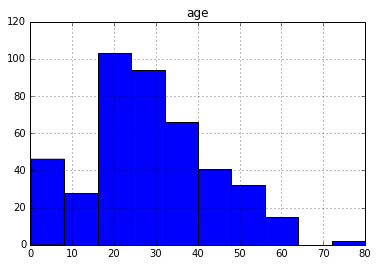

In [29]:
# Histogramas de variables continuas para valores positivos del target
titanic[var_numericas][var_target == 1].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7facf92d1d10>]], dtype=object)

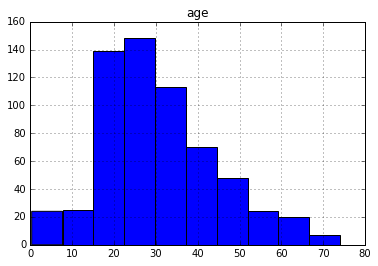

In [30]:
# Histogramas de variables continuas para valores negativos del target
titanic[var_numericas][var_target == 0].hist()

### Variable age

Vamos a analizar la varaible age superponiendo sus histogramas:

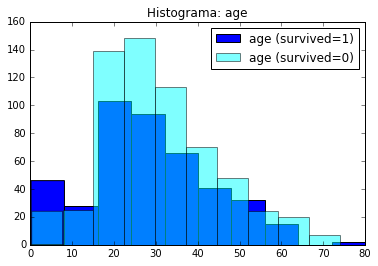

In [31]:
import matplotlib.pyplot as plt
plt.hist(titanic['age'][var_target == 1], bins=10, histtype='bar', color='blue', label='age (survived=1)') 
plt.hist(titanic['age'][var_target == 0], bins=10, histtype='bar', color='cyan', label='age (survived=0)', alpha=0.5)
plt.title('Histograma: age')
plt.legend()
plt.show()

Podemos ver varias zonas, pero seleccionaremos las siguientes para hacer una nueva agrupación binaria:
- survived = 1:
    - age < 15
    - age >= 52 and age <=57
    - age > 75
- survived = 0
    - el resto

In [32]:
titanic.loc[:, 'ageX'] = titanic['age'].map(lambda x: 'n1' if x<15 or (x>=52 and x<=57) or x>75 else 'n0')
get_WoE(titanic, 'ageX', 'survived') 

Obteniendo el Woe para la variable ageX :
  El WoE para n0 [ 896 ] es 0.463479503169
  El WoE para n1 [ 149 ] es -0.174941449496


### Nuevo conjunto de datos

In [33]:
# Eliminamos las variables reemplazadas
del titanic['age']
del titanic['sibsp']
del titanic['parch']

In [34]:
# Mostramos el nuevo conjunto de datos
titanic.head()

,pclass,survived,sex,embarked,sibspX,parchX,ageX
0,1,1,female,S,n0,n0,n0
1,1,1,male,S,n1,n2,n1
2,1,0,female,S,n1,n2,n1
3,1,0,male,S,n1,n2,n0
4,1,0,female,S,n1,n2,n0


In [35]:
# Actualizamos la lista de variables
var_target = titanic['survived']
var_numericas = []
var_categoricas = ['pclass', 'sex', 'embarked', 'sibspX', 'parchX', 'ageX']

In [36]:
# Obtenemos las tablas de frecuencias de las variables categóricas respecto de la variable objetivo (survived)
for var in var_categoricas:
    print "*** Tabla de frecuencias para la variable", var, "respecto de la variable survived:"
    print pd.crosstab(titanic['survived'], titanic[var])

*** Tabla de frecuencias para la variable pclass respecto de la variable survived:
pclass      1    2    3
survived               
0         103  146  369
1         181  115  131
*** Tabla de frecuencias para la variable sex respecto de la variable survived:
sex       female  male
survived              
0             96   522
1            292   135
*** Tabla de frecuencias para la variable embarked respecto de la variable survived:
embarked    C   Q    S
survived              
0          80  37  501
1         132  13  280
*** Tabla de frecuencias para la variable sibspX respecto de la variable survived:
sibspX     n0   n1  n2  n9
survived                  
0         439  133  20  26
1         261  147  16   3
*** Tabla de frecuencias para la variable parchX respecto de la variable survived:
parchX     n0   n1  n2  n9
survived                  
0         497   68  42  11
1         270  100  55   2
*** Tabla de frecuencias para la variable ageX respecto de la variable survived:
ageX     

## 3.4 Eliminación recursiva de variables

### Valor informativo (IV)

Una vez discretizadas las variables, vamos a analizar la capacidad de clasificacion de cada una de ellas mediante el algoritmo "Informative Value", para ver cuales vamos a dejar en el modelo.

In [37]:
from sklearn.linear_model.logistic import LogisticRegression

# Creamos una función para mostrar IV de un conjunto de datos
def calculateIV(datos, variables, target):

    # Iniciamos la variable resultado
    result_IV = []

    # Realizamos el cálculo para cada variable
    for v_cat in variables:
        var_target = array(target)
        var_values = array(datos[v_cat])
        var_levels = unique(var_values)

        mat_values = numpy.zeros(shape=(len(var_levels),2))

        for i in range(len(var_target)):
            # Obtenemos la posición en los niveles del valor
            for j in range(len(var_levels)):
                if var_levels[j] == var_values[i]:
                    pos = j
                    break

            # Estimamos el número de valores en cada nivel
            if var_target[i]:
                mat_values[pos][0] += 1
            else:
                mat_values[pos][1] += 1

            # Obtenemos el IV
            IV = 0
            for j in range(len(var_levels)):
                if mat_values[j][0] > 0 and mat_values[j][1] > 0:
                    rt = mat_values[j][0] / (mat_values[j][0] + mat_values[j][1])
                    rf = mat_values[j][1] / (mat_values[j][0] + mat_values[j][1])
                    IV += (rt - rf) * np.log(rt / rf)

        # Agregamos el IV al listado
        result_IV.append(IV)

    # Mostramos los resultados
    for i in range(len(var_categoricas)):
        print "La variable", var_categoricas[i], "el IV es", result_IV[i]

In [39]:
calculateIV(titanic, var_categoricas, var_target)

La variable pclass el IV es 0.67613129015
La variable sex el IV es 1.35855179749
La variable embarked el IV es 0.791228338157
La variable sibspX el IV es 1.8747155384
La variable parchX el IV es 1.47039450695
La variable ageX el IV es 0.120787699111


Las variables que tienen poder de clasificacion fuerte tienen un valor por encima de 0.3
Las variables que tienen poder de clasificacion muy fuerte tienen un valor por encima de 0.5
En este caso vamos a escoger: pclass, sex, embarked, sibspX y parchX

In [40]:
# Eliminamos las variables deshechadas
del titanic['ageX']

In [41]:
# Mostramos el nuevo conjunto de datos
titanic.head()

,pclass,survived,sex,embarked,sibspX,parchX
0,1,1,female,S,n0,n0
1,1,1,male,S,n1,n2
2,1,0,female,S,n1,n2
3,1,0,male,S,n1,n2
4,1,0,female,S,n1,n2


In [42]:
# Actualizamos la lista de variables categoricas
var_categoricas = ['pclass', 'sex', 'embarked', 'sibspX', 'parchX']

### Dummies

Ahora vamos a ver qué aportan las variables para la predicción del modelo.

In [43]:
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve

for v_cat in var_categoricas:
    dum_var    = pd.get_dummies(titanic[v_cat])
    features   = list(dum_var.columns)
    features.remove(features[1])
    classifier = LogisticRegression().fit(dum_var, var_target)
    y_pred     = classifier.predict(dum_var)
    
    print "**", v_cat
    print 'Precisión:', round(100 * accuracy_score(y_pred, var_target), 2), '%'
    print 'Exactitud:', round(100 * precision_score(y_pred, var_target), 2), '%'
    print 'Exhaustividad:', round(100 * recall_score(y_pred, var_target), 2), '%'

** pclass
Precisión: 66.6 %
Exactitud: 42.39 %
Exhaustividad: 63.73 %
** sex
Precisión: 77.89 %
Exactitud: 68.38 %
Exhaustividad: 75.26 %
** embarked
Precisión: 64.11 %
Exactitud: 30.91 %
Exhaustividad: 62.26 %
** sibspX
Precisión: 60.48 %
Exactitud: 34.43 %
Exhaustividad: 52.5 %
** parchX
Precisión: 63.44 %
Exactitud: 36.3 %
Exhaustividad: 58.49 %


Todas las variables presentan una precision (porcentaje de aciertos en positivos y negativos) por encima del 50%, por lo que todas ellas son buenas para nuestro modelo. Las variables sex y pclass son las que tienen mayor precisión, las mejores para predecir el modelo.

In [44]:
titanic_org = titanic.copy(deep = True) 

In [45]:
for column in var_categoricas:
    dummie = pd.get_dummies(titanic[column], prefix = column)
    names = list(dummie.columns)
    names.remove(names[0])
    titanic = pd.concat([titanic, dummie[names]], axis = 1)
    names = list(titanic.columns)
    names.remove(column)
    titanic = titanic[names]
    
titanic.describe()

,survived,pclass_2,pclass_3,sex_male,embarked_Q,embarked_S,sibspX_n1,sibspX_n2,sibspX_n9,parchX_n1,parchX_n2,parchX_n9
count,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000
mean,0.408612,0.249761,0.478469,0.628708,0.047847,0.747368,0.267943,0.034450,0.027751,0.160766,0.092823,0.012440
std,0.491813,0.433082,0.499775,0.483382,0.213544,0.434729,0.443100,0.182469,0.164338,0.367490,0.290323,0.110893
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
# Actualizamos la nueva lista de variables para el modelo
var_categoricas = ['pclass_2', 'pclass_3', 'sex_male', 'embarked_Q', 'embarked_S', 'sibspX_n1', 'sibspX_n2', 'sibspX_n9', 'parchX_n1', 'parchX_n2', 'parchX_n9']

### Factor de inflación de la varianza (VIF), colinealidad

Ahora vamos a ver la colinealidad de las variables. Si alguna es colineal podemos quitarla del modelo.

Vamos a calcular el valor del VIF para todas las variables menos la objetivo. Realizaremos una regresión lineal de cada una de las variables frente al resto y aplicamos la fórmula del VIF.

In [47]:
from sklearn.linear_model import LinearRegression

def calculateVIF(data):
    features = list(data.columns)
    num_features = len(features)
    
    model = LinearRegression()
    
    result = pd.DataFrame(index = ['VIF'], columns = features)
    result = result.fillna(0)
    
    for ite in range(num_features):
        x_features = features[:]
        y_featue = features[ite]
        x_features.remove(y_featue)
        
        x = data[x_features]
        y = data[y_featue]
        
        model.fit(data[x_features], data[y_featue])
        
        result[y_featue] = 1/(1 - model.score(data[x_features], data[y_featue]))
    
    return result

def selectDataUsingVIF(data, max_VIF = 5):
    result = data.copy(deep = True)
    
    VIF = calculateVIF(result)
    
    while VIF.as_matrix().max() > max_VIF:
        col_max = np.where(VIF == VIF.as_matrix().max())[1][0]
        features = list(result.columns)
        features.remove(features[col_max])
        result = result[features]
        
        VIF = calculateVIF(result)
        
    return result

In [48]:
print 'Número de variables:', len(var_categoricas)
calculateVIF(titanic[var_categoricas])

Número de variables: 11


,pclass_2,pclass_3,sex_male,embarked_Q,embarked_S,sibspX_n1,sibspX_n2,sibspX_n9,parchX_n1,parchX_n2,parchX_n9
VIF,1.629665,1.744888,1.115465,1.304368,1.39721,1.202039,1.036359,1.235872,1.191852,1.244306,1.04746


Todas las variables presentan valores por debajo de 5, por lo que no hay que eliminar ninguna variable del modelo. 

## 3.6 Creación de muestras de entrenamiento y validación

En la evaluación de modelos predictivos se utilizan técnicas de separación de los datos en un conjunto de entrenamiento (train) y un conjunto de prueba (test). Los modelos se entrenan con los datos del conjunto de entrenamiento (train) y se evalúan con los datos del conjunto de prueba (test).

Scikit learn contiene una función que permite separar los datos de entrenamiento de los de prueba, automáticamente y de forma aleatoria. El método se llama cross_validation.train_test_split, y permite indicar el porcentaje de muestras que queramos para cada conjunto.

In [49]:
from sklearn.cross_validation import train_test_split

# Obtenemos las muestras de entrenamiento (80%) y prueba (20%)
x = titanic[var_categoricas]
y = titanic['survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print titanic.shape,"xtrain:",  x_train.shape, "xtest", x_test.shape

(1045, 12) xtrain: (836, 11) xtest (209, 11)


Tenemos cuatro conjuntos, dos versiones de los datos de las dimensiones que generalmente llamamos features y dos versiones de las clases. Una versión es para entrenar (train) y otra para probar (test). Hemos asignado el 80% de los datos a la versión de entrenamiento, y el 20% restante a la versión de prueba.

## 3.7 Análisis de variables del modelo

Ahora debemos seleccionar, de entre todas las variables candidatas a ser explicativas de la variable dependiente, un subconjunto que resulte suficientemente explicativo. Para ello se suelen utilizar métodos más o menos automáticos, como el método backward, el método forward o el método stepwise.

Utilizarenmos las funciones forward_regression y backward_regression creadas más arriba en este mismo notebook.

In [50]:
# Aplicamos el método forward
forward_regression(x, y)

Paso 1 variable sex_male con RMS 0.425804143159
Paso 2 variable pclass_3 con RMS 0.417144300425
Paso 3 variable pclass_2 con RMS 0.41080600189
Paso 4 variable parchX_n1 con RMS 0.407441350313
Paso 5 variable embarked_S con RMS 0.405692652218
Paso 6 variable embarked_Q con RMS 0.403331538855
Paso 7 variable sibspX_n9 con RMS 0.402483925789
Paso 8 variable parchX_n2 con RMS 0.400483977348


In [51]:
# Aplicamos el método backward
backward_regression(x, y)

En el paso 0 se ha eliminado la varible n0 con un error 0.430230144194
En el paso 1 se ha eliminado la varible n2 con un error 0.442234800138


In [52]:
# Actualizamos la nueva lista de variables para el modelo
var_categoricas = [ 'sex_male', 'pclass_3', 'pclass_2', 'parchX_n2', 'embarked_S' ]

## 3.8 Evaluación del modelo

**Sobreajuste**

Para evaluar la calidad de un modelo es importante medir el error en el conjunto de entrenamiento y en la predicción.

La utilización exclusiva del error del conjunto de entrenamiento puede conducir a resultados engañosos.

Estos errores pueden conducir a un fenómeno de sobreajuste (overfitting), en el cual el modelo se ajusta muy bien a los datos exitentes pero tiene un pobre rendimiento para predecir nuevos resultados.

**Curvas ROC**

Para evaluar la capacidad predictiva de los modelos de regresión ajustados empleamos las curvas ROC. Mediante el análisis ROC podemos elegir un subconjunto de clasificadores entre los cuales seguro estará el clasificador óptimo para cualquier contexto posible.

El modelo de regresión constituye un clasificador probabilístico, ya que nos proporciona las probabilidades de pertenencia a la clase I (Y=1, casos). Empleamos como indicador el AUC.

El clasificador probabilístico será mejor cuanto mayor sea área bajo la curva ROC (AUC, Area Under the ROC Curve).

Las AUC para los conjuntos de entrenamiento y prueba no deberían diferir más del 20% entre sí.

**Matriz de confusión**

La matriz de confusión es una herramienta que permite la visualización del desempeño de un algoritmo de aprendizaje supervisado. Cada columna de la matriz representa el número de predicciones de cada clase, mientras que cada fila representa a las instancias en la clase real. Uno de los beneficios de las matrices de confusión es que facilitan ver si el sistema está confundiendo dos clases.

**Clasificación**

En scikit-learn hay tres métodos básicos para clasificación dado un modelo:
- **modelo.fit(X, y)**: ajuste de los parámetros del modelo a los datos
- **modelo.predict(X)**: predicción de los valores de salida para datos nuevos
- **modelo.score(X, y)**: método de evaluación de la predicción

In [53]:
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve

# Creamos una función para el cálculo de métricas de cada variable
def metricas_modelos(y_true, y_pred):
    from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve

    # Obtención de matriz de confusión
    confusion_matrix = confusion_matrix(y_true, y_pred)

    print "La matriz de confusión es "
    print confusion_matrix

    print 'Precisión:', accuracy_score(y_true, y_pred)
    print 'Exactitud:', precision_score(y_true, y_pred) 
    print 'Exhaustividad:', recall_score(y_true, y_pred)
    print 'F1:', f1_score(y_true, y_pred)

    false_positive_rate, recall, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(false_positive_rate, recall)

    print 'AUC:', auc(false_positive_rate, recall)

    plot(false_positive_rate, recall, 'b')
    plot([0, 1], [0, 1], 'r--')
    title('AUC = %0.2f' % roc_auc)

Obtenemos las muestras de entrenamiento y prueba.

In [54]:
from sklearn.cross_validation import train_test_split

# Obtenemos las muestras de entrenamiento (80%) y prueba (20%)
x = titanic[var_categoricas]
y = titanic['survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print titanic.shape,"xtrain:",  x_train.shape, "xtest", x_test.shape

(1045, 12) xtrain: (836, 5) xtest (209, 5)


In [55]:
from sklearn.linear_model.logistic import LogisticRegression

# Obtenemos la clasificación
classifier = LogisticRegression().fit(x_train, y_train)

La matriz de confusión es 
[[411  79]
 [109 237]]
Precisión: 0.775119617225
Exactitud: 0.75
Exhaustividad: 0.684971098266
F1: 0.716012084592
AUC: 0.761873304235


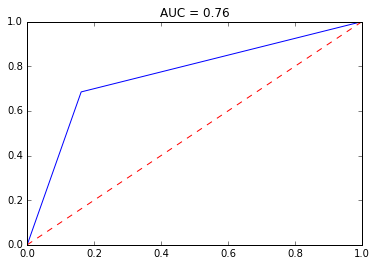

In [56]:
# Obtenemos la matriz de confusión para el conjunto de datos de entrenamiento
y_pred = classifier.predict(x_train)
metricas_modelos(y_train, y_pred)

La matriz de confusión es 
[[109  19]
 [ 23  58]]
Precisión: 0.799043062201
Exactitud: 0.753246753247
Exhaustividad: 0.716049382716
F1: 0.73417721519
AUC: 0.783805941358


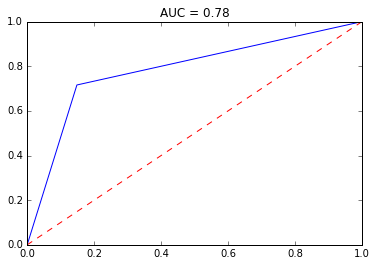

In [57]:
# Obtenemos la matriz de confusión para el conjunto de datos de prueba
y_pred = classifier.predict(x_test)
metricas_modelos(y_test, y_pred)

Las áreas bajo la curva (AUC) tienen valores aceptables, y no difieren demasiado entre sí. Podemos considerar el modelo como bueno.

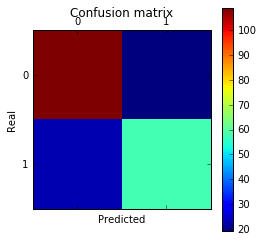

In [58]:
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Real')
plt.xlabel('Predicted')
plt.show()

En la matriz de confusion se puede ver que muchos mas acierto (TP) que del resto. El algoritmo acierta muy bien las muertes.

In [59]:
print var_categoricas
classifier.coef_

['sex_male', 'pclass_3', 'pclass_2', 'parchX_n2', 'embarked_S']


array([[-2.28813005, -1.38010636, -0.67855216,  0.17240935, -0.47690621]])

La supervivencia de los pasajeros del Titanic dependió del sexo y de la clase en la que viajaban.

### Algunos enlaces:
- [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/data)
- [Encyclopedia Titanica](https://www.encyclopedia-titanica.org/)
- [Selección de variables explicativas en la regresión](https://jjgibaja.wordpress.com/2007/10/23/seleccion-de-variables-explicativas-en-la-regresion/)
- [Scikit learn book](http://nbviewer.jupyter.org/github/gmonce/scikit-learn-book/tree/master/)
- [Explaining Titanic Hypothesis with Decision Trees](http://nbviewer.jupyter.org/github/gmonce/scikit-learn-book/blob/master/Chapter%202%20-%20Supervised%20learning%20-%20Explaining%20Titanic%20Hypothesis%20with%20Decision%20Trees.ipynb)
- [Introducción a scikit-learn](http://linuxec.es/grupo-python/sklearn/#)
- [Sobreajuste - Overfitting](http://wwwae.ciemat.es/~cardenas/docs/lessons/sobreajuste.pdf)
- [Integración y Adaptación de Modelos](http://users.dsic.upv.es/~jorallo/docent/master/t2.pdf)
- [Getting Started with Kaggle Data Science Competitions](http://blogs.mathworks.com/loren/2015/06/18/getting-started-with-kaggle-data-science-competitions/)